# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

city_weather = requests.get(f"https://api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}").json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1685423842,
 'id': 2643743,
 'main': {'feels_like': 282.38,
          'humidity': 80,
          'pressure': 1029,
          'temp': 283.23,
          'temp_max': 283.85,
          'temp_min': 282.31},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1685418671,
         'sunset': 1685477108,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 2.57}}


### Generate the Cities List by Using the `citipy` Library

---

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | al fahahil
Processing Record 5 of Set 1 | nadym
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | leticia
Processing Record 8 of Set 1 | brisas de zicatela
Processing Record 9 of Set 1 | torrington
Processing Record 10 of Set 1 | onguday
Processing Record 11 of Set 1 | viamao
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | leh
Processing Record 14 of Set 1 | sormiou
City not found. Skipping...
Processing Record 15 of Set 1 | fuli
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | galesong
Processing Record 18 of Set 1 | mogocha
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | papatowai
Processing Recor

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,280.58,94,100,15.17,TF,1685424006
1,grytviken,-54.2811,-36.5092,272.35,80,39,4.62,GS,1685424006
2,ushuaia,-54.8000,-68.3000,278.96,87,0,0.00,AR,1685424007
3,al fahahil,29.0825,48.1303,307.49,43,67,5.41,KW,1685424007
4,nadym,65.5333,72.5167,291.64,47,99,11.77,RU,1685424008


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,280.58,94,100,15.17,TF,1685424006
1,grytviken,-54.2811,-36.5092,272.35,80,39,4.62,GS,1685424006
2,ushuaia,-54.8000,-68.3000,278.96,87,0,0.00,AR,1685424007
3,al fahahil,29.0825,48.1303,307.49,43,67,5.41,KW,1685424007
4,nadym,65.5333,72.5167,291.64,47,99,11.77,RU,1685424008


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

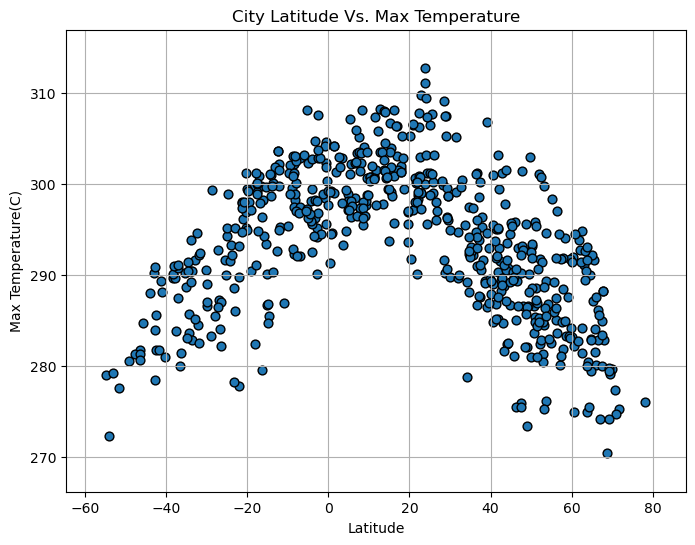

In [24]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter",x="Lat",y="Max Temp",s=40,marker ="o",facecolor="blue",edgecolor ="k",grid=True, figsize=(8,6),\
                  xlabel = "Latitude", ylabel = "Max Temperature(C)", title = f"City Latitude Vs. Max Temperature" ) 

# Incorporate the other graph properties

xmin = city_data_df["Lat"].min() - 10
xmax=city_data_df["Lat"].max() + 10
ymin=city_data_df["Max Temp"].min()- 0.1 * (city_data_df["Max Temp"].max()-city_data_df["Max Temp"].min())
ymax=city_data_df["Max Temp"].max()+ 0.1 * (city_data_df["Max Temp"].max()-city_data_df["Max Temp"].min())
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

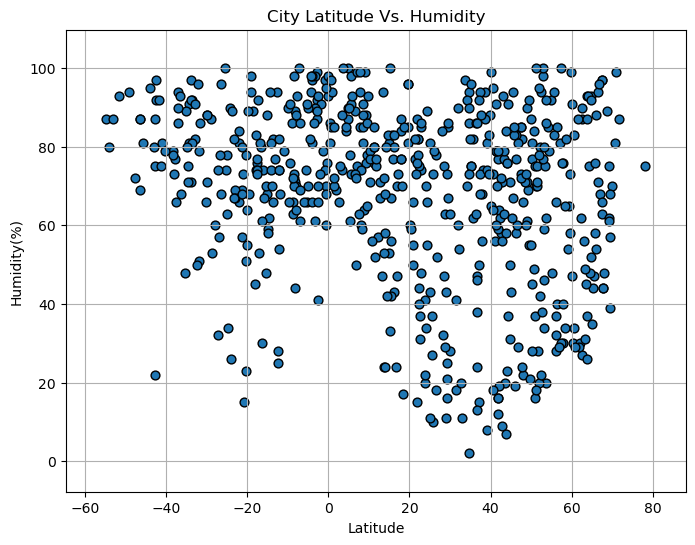

In [25]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter",x="Lat",y="Humidity",s=40,marker ="o",facecolor="blue",edgecolor ="k",grid=True, figsize=(8,6),\
                  xlabel = "Latitude", ylabel = "Humidity(%)", title = f"City Latitude Vs. Humidity" ) 


# Incorporate the other graph properties
xmin = city_data_df["Lat"].min() - 10
xmax=city_data_df["Lat"].max() + 10
ymin=city_data_df["Humidity"].min()- 0.1 * (city_data_df["Humidity"].max()-city_data_df["Humidity"].min())
ymax=city_data_df["Humidity"].max()+ 0.1 * (city_data_df["Humidity"].max()-city_data_df["Humidity"].min())
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

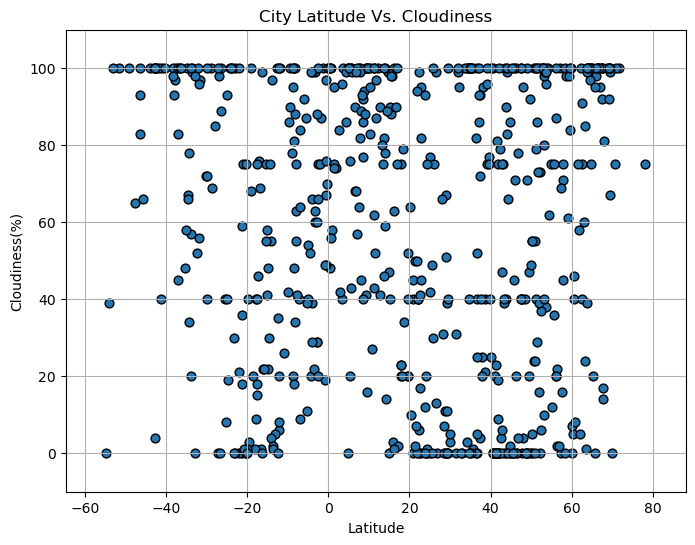

In [26]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter",x="Lat",y="Cloudiness",s=40,marker ="o",facecolor="blue",edgecolor ="k",grid=True, figsize=(8,6),\
                  xlabel = "Latitude", ylabel = "Cloudiness(%)", title = f"City Latitude Vs. Cloudiness" ) 


# Incorporate the other graph properties
xmin = city_data_df["Lat"].min() - 10
xmax=city_data_df["Lat"].max() + 10
ymin=city_data_df["Cloudiness"].min()- 0.1 * (city_data_df["Cloudiness"].max()-city_data_df["Cloudiness"].min())
ymax=city_data_df["Cloudiness"].max()+ 0.1 * (city_data_df["Cloudiness"].max()-city_data_df["Cloudiness"].min())
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

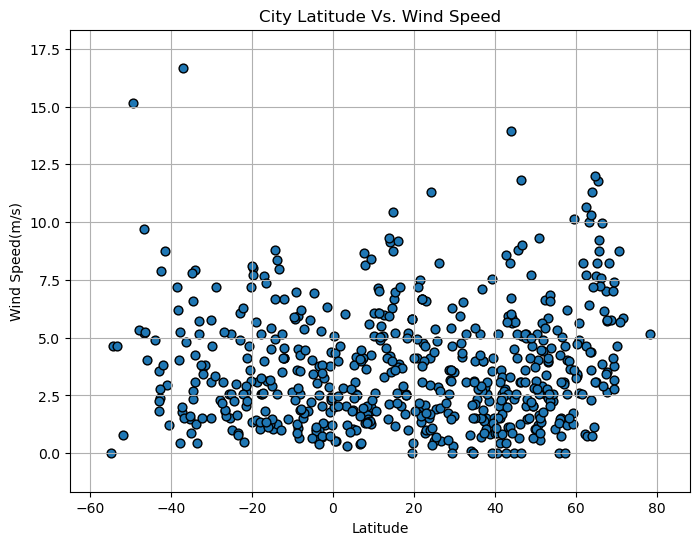

In [27]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter",x="Lat",y="Wind Speed",s=40,marker ="o",facecolor="blue",edgecolor ="k",grid=True, figsize=(8,6),\
                  xlabel = "Latitude", ylabel = "Wind Speed(m/s)", title = f"City Latitude Vs. Wind Speed" ) 


# Incorporate the other graph properties
xmin = city_data_df["Lat"].min() - 10
xmax=city_data_df["Lat"].max() + 10
ymin=city_data_df["Wind Speed"].min()- 0.1 * (city_data_df["Wind Speed"].max()-city_data_df["Wind Speed"].min())
ymax=city_data_df["Wind Speed"].max()+ 0.1 * (city_data_df["Wind Speed"].max()-city_data_df["Wind Speed"].min())
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


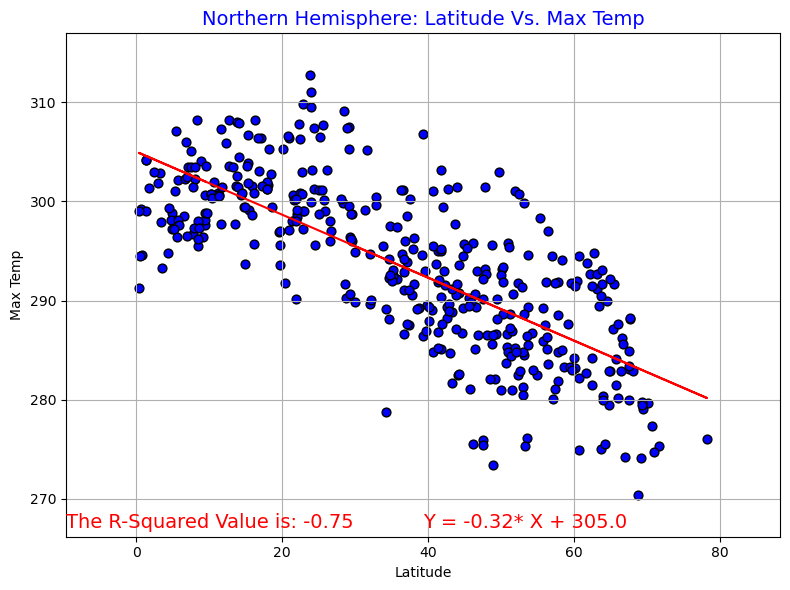

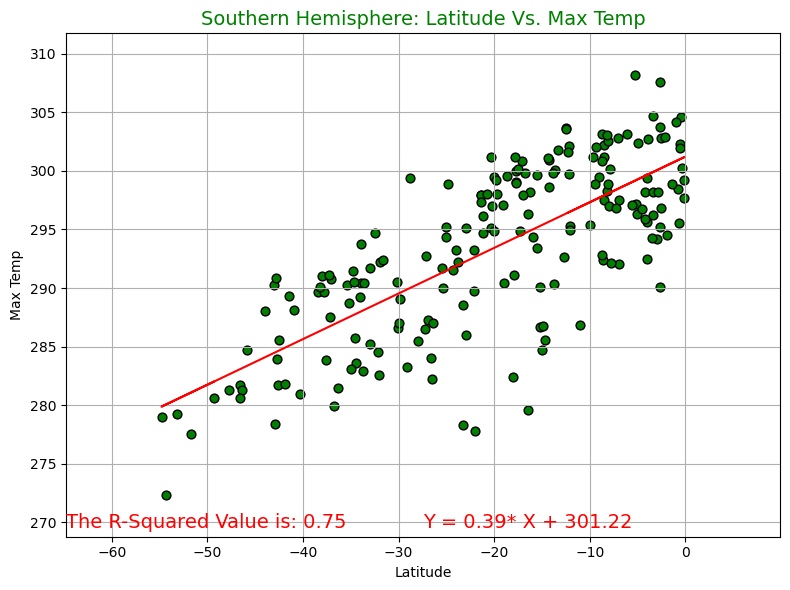

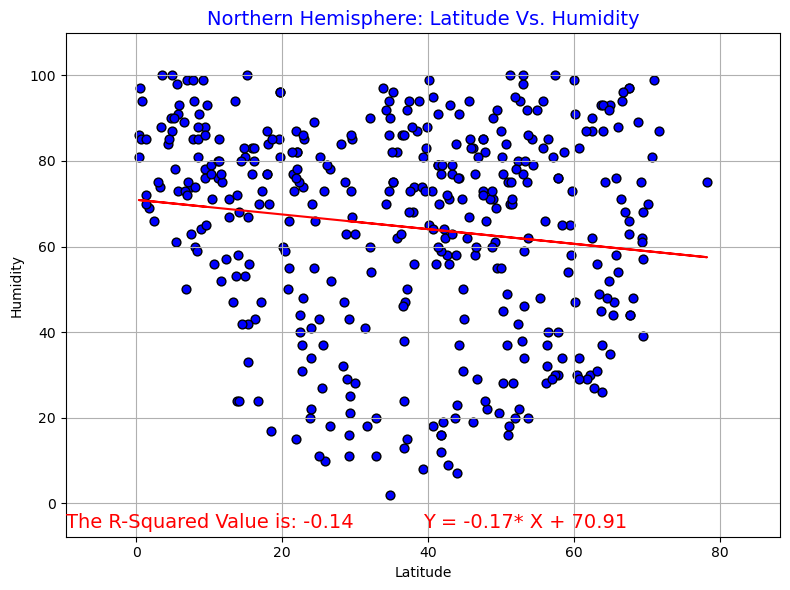

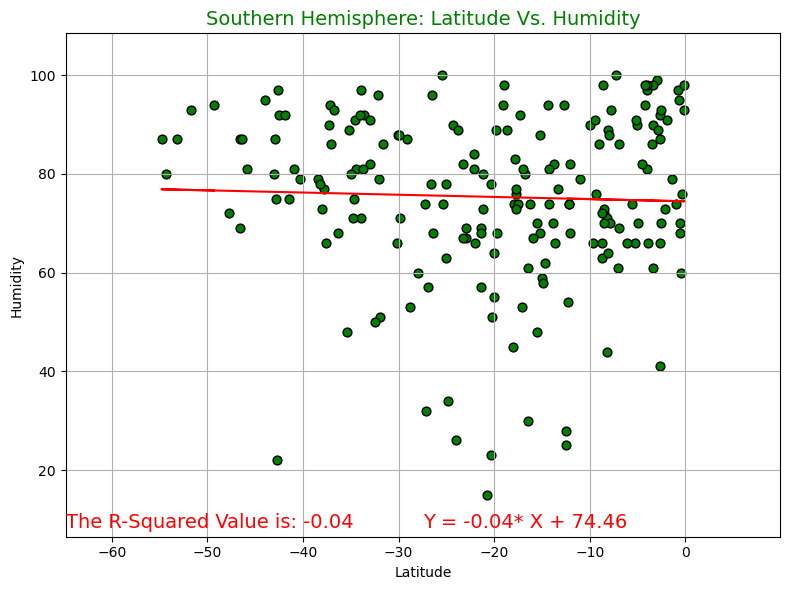

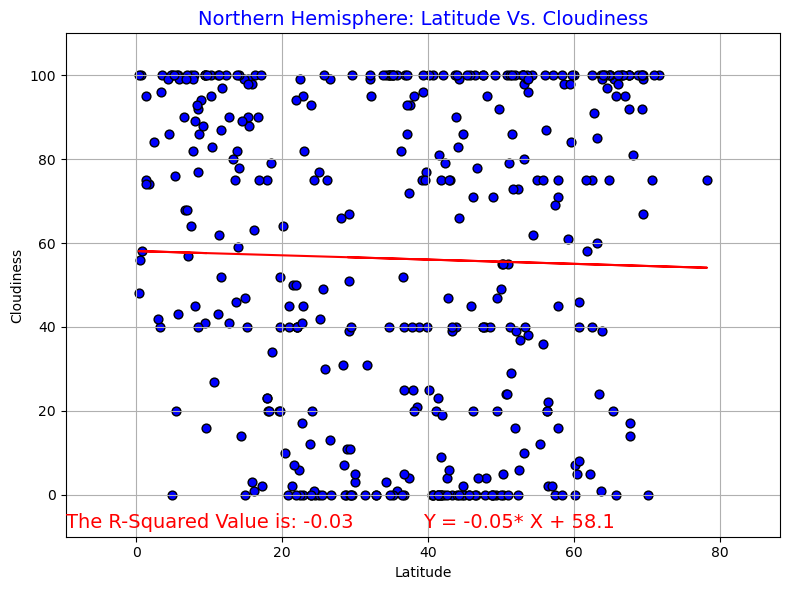

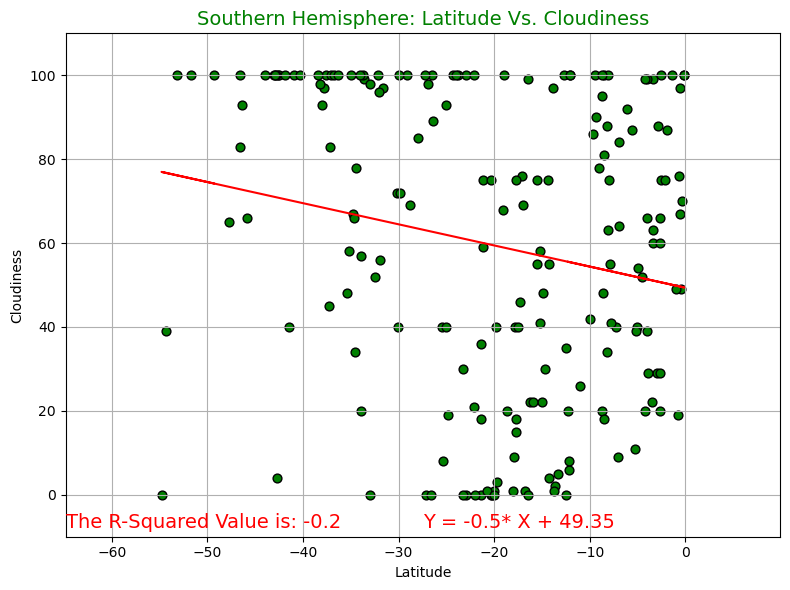

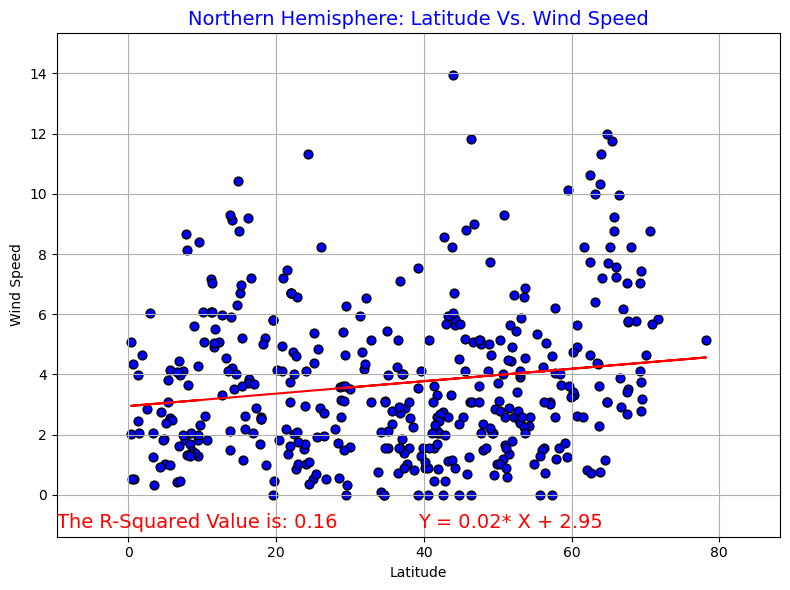

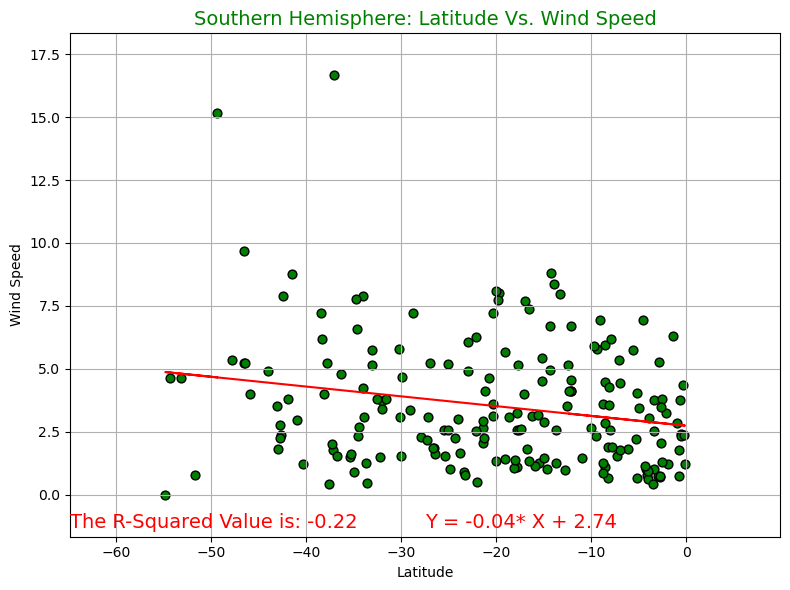

In [28]:
# Define a function to create Linear Regression plots
def plot_scatters(Dataframe,X_Column,Y_Column_List,Hemispheres):

    for i,Y_Column in enumerate(Y_Column_List):
        
        for h,hem in enumerate(Hemispheres):
        
                if h==0:
                    plot_df =  Dataframe.loc[Dataframe[X_Column]>= 0,[X_Column,Y_Column]].reset_index(drop=True)
                    plot_df.plot(kind="scatter",x=X_Column,y=Y_Column,s=40,marker ="o",color="blue",edgecolor ="k",grid=True, figsize=(8,6),\
                    xlabel = "Latitude", ylabel = f"{Y_Column}") 
                    font = {'color':  'blue','fontweight': '3','fontsize': 14}    

                else:
                    plot_df =  Dataframe.loc[Dataframe[X_Column]< 0,[X_Column,Y_Column]].reset_index(drop=True)
                    plot_df.plot(kind="scatter",x=X_Column,y=Y_Column,s=40,marker ="o",color="green",edgecolor ="k",grid=True, figsize=(8,6),\
                    xlabel = "Latitude", ylabel = f"{Y_Column}") 
                    font = {'color':  'green','fontweight': '3','fontsize': 14}    
                
                plt.title(f"{hem}: Latitude Vs. {Y_Column}",fontdict=font)  
                
                xaxis = plot_df[X_Column]
                yaxis =  plot_df[Y_Column]
                
                xmin = xaxis.min() - 10
                xmax=xaxis.max() + 10
                ymin=yaxis.min()- 0.1 * (yaxis.max()-yaxis.min())
                ymax=yaxis.max()+ 0.1 * (yaxis.max()-yaxis.min())
                plt.xlim(xmin,xmax)
                plt.ylim(ymin,ymax)

                (slope, intercept, r, p, std_e) = st.linregress(xaxis,yaxis)
                regress_line = (slope * xaxis) + intercept
                regress_eq = "Y = " + str(round(slope,2))+ "* X + " + str(round(intercept,2))

                plt.plot(xaxis,regress_line,color = "r")
                plt.annotate(regress_eq,xy=(xmin+((xmax - xmin)/2),yaxis.min()- 0.08 * (yaxis.max()-yaxis.min())),color="r",fontsize=14)
                plt.annotate(f"The R-Squared Value is: {round(r,2)}",xy=(xmin,yaxis.min()- 0.08 * (yaxis.max()-yaxis.min())),color="r",fontsize=14)
                plt.tight_layout()


Hemispheres = ["Northern Hemisphere", "Southern Hemisphere"]
y_col_list = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
plot_scatters(city_data_df,"Lat",y_col_list,Hemispheres)        

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =  city_data_df.loc[city_data_df["Lat"]>= 0,:].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,al fahahil,29.0825,48.1303,307.49,43,67,5.41,KW,1685424007
1,nadym,65.5333,72.5167,291.64,47,99,11.77,RU,1685424008
2,brisas de zicatela,15.8369,-97.0419,301.54,77,3,2.62,MX,1685424009
3,torrington,41.8007,-73.1212,285.14,77,0,2.06,US,1685424009
4,onguday,50.7500,86.1500,286.64,49,100,1.20,RU,1685424010


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[city_data_df["Lat"]< 0,:].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,280.58,94,100,15.17,TF,1685424006
1,grytviken,-54.2811,-36.5092,272.35,80,39,4.62,GS,1685424006
2,ushuaia,-54.8000,-68.3000,278.96,87,0,0.00,AR,1685424007
3,adamstown,-25.0660,-130.1015,294.33,63,93,5.18,PN,1685424008
4,leticia,-4.2153,-69.9406,298.18,94,20,1.03,CO,1685424008


###  Temperature vs. Latitude Linear Regression Plot

In [31]:
# ALL PLOTS WERE CREATED IN A SINGLE FUNCTION ABOVE - IT FOLLOWS THE SAME ORDER EXPECTED HERE

**Discussion about the linear relationship:** 
There is a high correlation (R-Square) of 75% between max temperature and latitude - in both Northern and Souther Hemispheres

In the Southern Hemisphere the relationship is linear and positive ie. - as we move towards the equator and the latitude increases, there is an increase in max temperature.

In the Northern Hemisphere the relationship is linear and negative ie. - as we move towards the equator and the latitude decreases, there is an increase in max temperature.

### Humidity vs. Latitude Linear Regression Plot

In [32]:
# ALL PLOTS WERE CREATED IN A SINGLE FUNCTION ABOVE - IT FOLLOWS THE SAME ORDER EXPECTED HERE

**Discussion about the linear relationship:** There is a negative correlation (R-Square) between latitude and humidity in both Northern and Southern Hemispheres, but it is very low at less than 15%. Hence we can conclude there is no linear relationship.

Just an observation outside of linear regression - the scatter plot shows that in the Southern Hemisphere, there are higher number of humid cities closer to the equator (latitude = 0)

### Cloudiness vs. Latitude Linear Regression Plot

In [33]:
# ALL PLOTS WERE CREATED IN A SINGLE FUNCTION ABOVE - IT FOLLOWS THE SAME ORDER EXPECTED HERE

**Discussion about the linear relationship:** There is a negative correlation (R-Square) between latitude and cloudiness but it is very low at -20% Southern and -3% in Northern Hemispheres. Hence we can conclude there is no linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

In [34]:
# ALL PLOTS WERE CREATED IN A SINGLE FUNCTION ABOVE - IT FOLLOWS THE SAME ORDER EXPECTED HERE

**Discussion about the linear relationship:** 
There is a very low positive correlation (R-Square) of 16% between latitude and Wind Speed - in the Northern Hemisphere 

There is a very low negative correlation (R-Square) of -22% between latitude and Wind Speed - in the Southern Hemisphere 

So as we move towards the equator the Wind Speed decreases - but the R-Square is too low to conclude a linear relationship.